In [174]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as sk
import warnings

In [175]:
titanic_df=pd.read_csv(r'/Users/bernadinesheik-essop/Downloads/Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


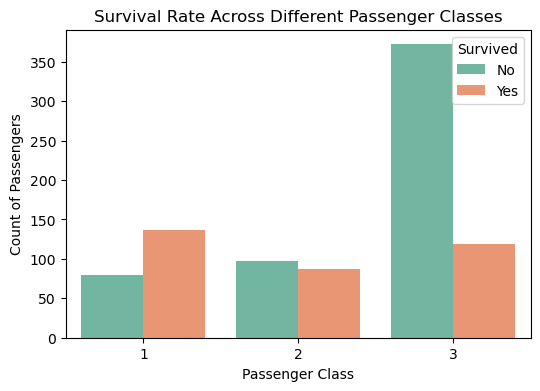

In [176]:
#Question One
#Write a Python code snippet to visualize the survival rate across different passenger classes. 
#The plot should display a count of survivors and non-survivors for each class.

#1.	Use a bar plot to show the count of survivors and non-survivors.
#2.	Ensure that the x-axis represents the passenger classes, and the plot is colored based on survival status.

# Create a count plot for the survival rate across different passenger classes
plt.figure(figsize=(6, 4))
sns.countplot(data=titanic_df, x='Pclass', hue='Survived', palette='Set2')

# Set plot labels and title
plt.xlabel('Passenger Class')
plt.ylabel('Count of Passengers')
plt.title('Survival Rate Across Different Passenger Classes')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])

# Display the plot
plt.show()

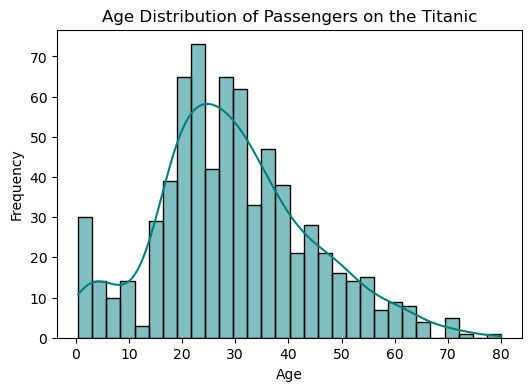

In [177]:
#Question Two
#Create a visualization that shows the age distribution of passengers on the ship.
#1.	Use a histogram or a KDE (Kernel Density Estimate) plot.
#2.	Add labels for the x-axis (age) and y-axis (frequency).
#3.	Comment on any noticeable patterns in the age distribution.

# Create a histogram and KDE plot for the age distribution of passengers
plt.figure(figsize=(6, 4))

# Plotting the histogram with KDE
sns.histplot(titanic_df['Age'].dropna(), kde=True, color ='teal', bins=30)

# Set plot labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Passengers on the Titanic')

# Display the plot
plt.show()

In [178]:
#Notable Patterns of the above:
#The distribution is slightly right-skewed, with more passengers in the younger age groups.
#Fewer passengers were in the older age groups (above 60).
#This distribution gives an insight into the demographics of those aboard the Titanic, showing that the 
#majority of passengers were relatively young

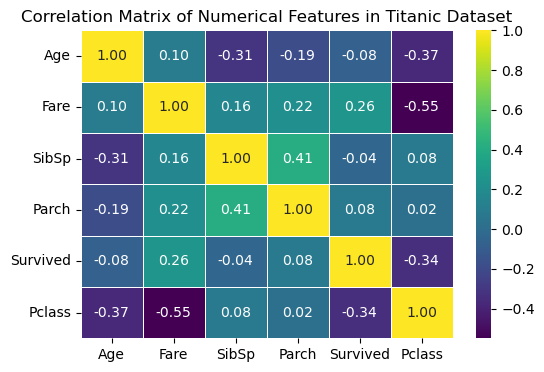

In [179]:
#Question Three
#Analyze the correlations between the numerical features in the Titanic dataset
#(e.g., age, fare, siblings/spouses aboard).
#1.	Create a correlation matrix using the Titanic dataset.
#2.	Use a heatmap to visualize the correlation matrix.
#3.	Annotate the heatmap with correlation values.

# Select numerical features for correlation analysis
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch', 'Survived', 'Pclass']

# Calculate the correlation matrix
correlation_matrix = titanic_df[numerical_features].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)

# Set plot title
plt.title('Correlation Matrix of Numerical Features in Titanic Dataset')

# Display the heatmap
plt.show()

In [180]:
#The heatmap above visualizes the correlation matrix for the numerical features in the Titanic dataset.
#Key Observations:

#Survived and Pclass: There is a negative correlation (-0.34), indicating that lower-class passengers (higher Pclass value) had a lower survival rate.
#Age and Parch/SibSp: Age has a weak negative correlation with the number of parents/children (Parch) and siblings/spouses (SibSp) aboard, suggesting that younger passengers were more likely to travel with family.
#Fare and Pclass: There is a strong negative correlation (-0.55) between Fare and Pclass, which makes sense since higher-class tickets (lower Pclass value) were more expensive.
#These correlations provide insights into how different features relate to one another, which can be useful for understanding the dataset's structure and for feature selection in predictive modeling. ​

<Figure size 1200x800 with 0 Axes>

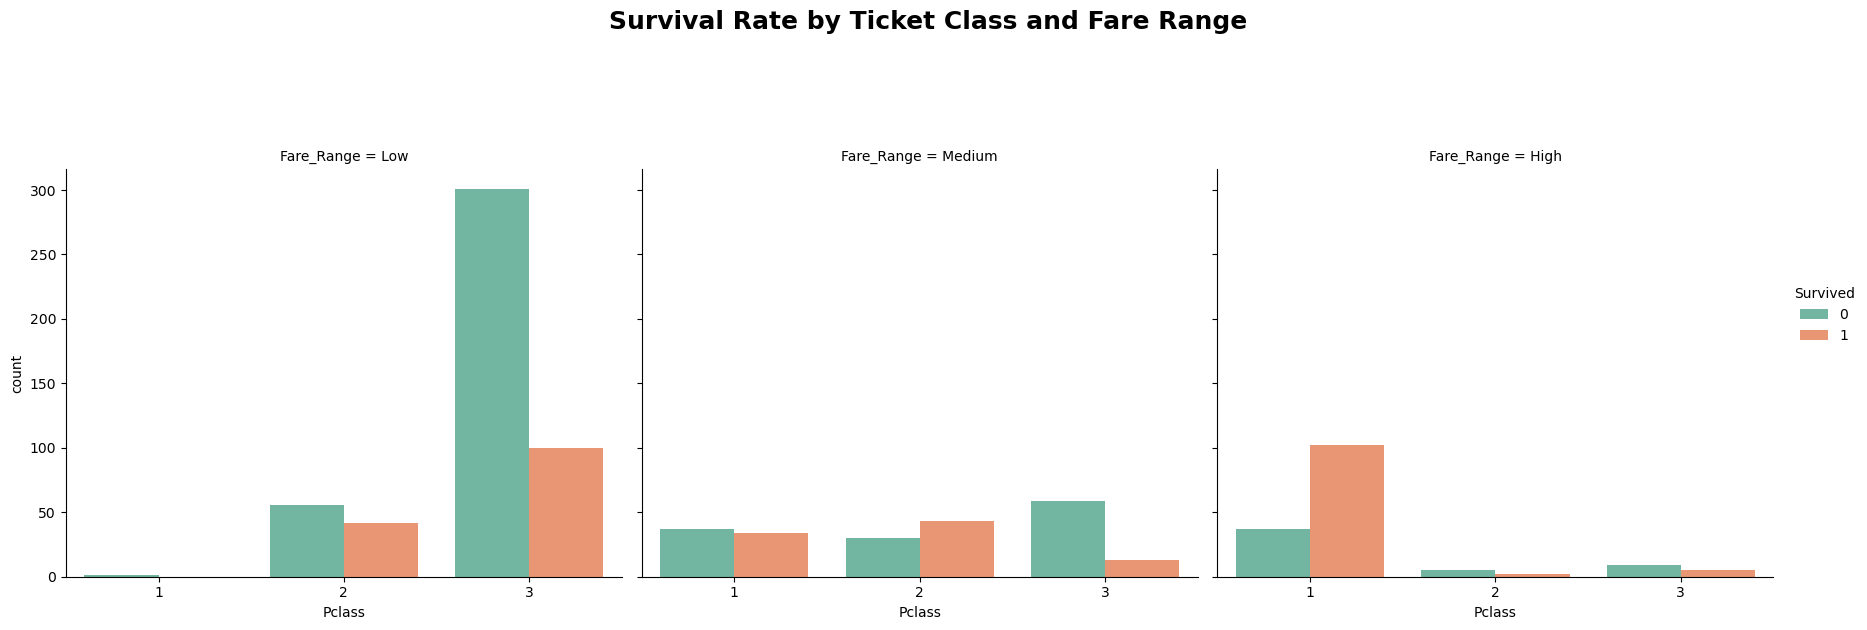

In [181]:
#Question Four
#Visualize the survival rate by ticket class and different fare ranges (e.g., low, medium, high).
#1.	Bin the fare data into different ranges.
#2.	Create a bar plot or cat plot showing survival rates across these fare ranges.
#3.	Analyze how fare and class together impact survival.


# Suppress UserWarning messages
warnings.filterwarnings("ignore", category=UserWarning)

# Bin the fare data into categories: Low, Medium, High
titanic_df['Fare_Range'] = pd.cut(
    titanic_df['Fare'],
    bins=[0, 20, 50, 600],
    labels=['Low', 'Medium', 'High'])

# Create a cat plot to show survival rates by ticket class and fare range
plt.figure(figsize=(12, 8))
sns.catplot(data=titanic_df, x='Pclass', hue='Survived', col='Fare_Range', kind='count', height=5, aspect=1.2, palette='Set2')

# Set plot title
plt.suptitle('Survival Rate by Ticket Class and Fare Range', y=1.25, fontsize=18, fontweight='bold')


# Display the plot
plt.show()

In [182]:
#The visualization shows the survival rate by ticket class and different fare ranges (Low, Medium, High).
#Analysis:

#Low Fare Range: Passengers who paid lower fares generally had lower survival rates across all classes, with 
#third-class passengers having the lowest survival rate.
#Medium Fare Range: Survival rates improve with higher ticket classes, particularly in first and second classes.
#High Fare Range: Passengers in this range, especially those in first class, had the highest survival rates,
#indicating a strong link between paying higher fares and better chances of survival.